<p style="text-align:center">
    <a href="https://skills.network/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDA0321ENSkillsNetwork21426264-2022-01-01" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Exploratory Data Analysis Lab**


Estimated time needed: **30** minutes


In this module you get to work with the cleaned dataset from the previous module.

In this assignment you will perform the task of exploratory data analysis.
You will find out the distribution of data, presence of outliers and also determine the correlation between different columns in the dataset.


## Objectives


In this lab you will perform the following:


*   Identify the distribution of data in the dataset.

*   Identify outliers in the dataset.

*   Remove outliers from the dataset.

*   Identify correlation between features in the dataset.


***


## Hands on Lab


Import the pandas module.


In [2]:
import pandas as pd

Load the dataset into a dataframe.


In [65]:
df = pd.read_csv("https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DA0321EN-SkillsNetwork/LargeData/m2_survey_data.csv")

## Distribution


### Determine how the data is distributed


The column `ConvertedComp` contains Salary converted to annual USD salaries using the exchange rate on 2019-02-01.

This assumes 12 working months and 50 working weeks.


Plot the distribution curve for the column `ConvertedComp`.


C:\Users\rlong\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Distribution of Normalized Compensation')

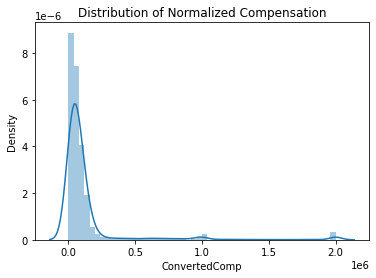

In [4]:
# your code goes here
import matplotlib as mpt
import matplotlib.pyplot as plt
import seaborn as sns
#x = pd.Series(df, name="ConvertedComp")

#ax = sns.distplot(x)

ax=sns.distplot(df["ConvertedComp"])
plt.title('Distribution of Normalized Compensation')

Plot the histogram for the column `ConvertedComp`.


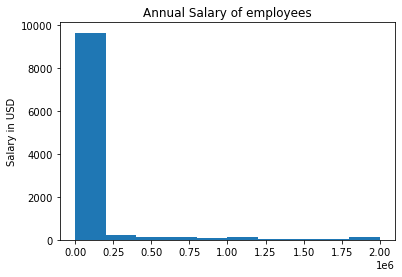

In [5]:
# your code goes here

df['ConvertedComp'].plot(kind='hist')
plt.title('Annual Salary of employees')
plt.ylabel('Salary in USD')
plt.xlabel('')
plt.show()

What is the median of the column `ConvertedComp`?


In [74]:
# your code goes here
df['ConvertedComp'].mean()

131596.7316197316

In [52]:
df.columns

Index(['Respondent', 'MainBranch', 'Hobbyist', 'OpenSourcer', 'OpenSource',
       'Employment', 'Country', 'Student', 'EdLevel', 'UndergradMajor',
       'EduOther', 'OrgSize', 'DevType', 'YearsCode', 'Age1stCode',
       'YearsCodePro', 'CareerSat', 'JobSat', 'MgrIdiot', 'MgrMoney',
       'MgrWant', 'JobSeek', 'LastHireDate', 'LastInt', 'FizzBuzz',
       'JobFactors', 'ResumeUpdate', 'CurrencySymbol', 'CurrencyDesc',
       'CompTotal', 'CompFreq', 'ConvertedComp', 'WorkWeekHrs', 'WorkPlan',
       'WorkChallenge', 'WorkRemote', 'WorkLoc', 'ImpSyn', 'CodeRev',
       'CodeRevHrs', 'UnitTests', 'PurchaseHow', 'PurchaseWhat',
       'LanguageWorkedWith', 'LanguageDesireNextYear', 'DatabaseWorkedWith',
       'DatabaseDesireNextYear', 'PlatformWorkedWith',
       'PlatformDesireNextYear', 'WebFrameWorkedWith',
       'WebFrameDesireNextYear', 'MiscTechWorkedWith',
       'MiscTechDesireNextYear', 'DevEnviron', 'OpSys', 'Containers',
       'BlockchainOrg', 'BlockchainIs', 'BetterLife'

How many responders identified themselves only as a **Man**?


In [53]:
# your code goes here
df['Gender'].value_counts()['Man']

10480

Find out the  median ConvertedComp of responders identified themselves only as a **Woman**?


In [54]:
# your code goes here
woman_df=df[df['Gender']=='Woman']
woman_df["ConvertedComp"].median()



57708.0

Give the five number summary for the column `Age`?


**Double click here for hint**.

<!--
min,q1,median,q3,max of a column are its five number summary.
-->


In [50]:
# your code goes here
df['Age'].describe()

count    11111.000000
mean        30.778895
std          7.393686
min         16.000000
25%         25.000000
50%         29.000000
75%         35.000000
max         99.000000
Name: Age, dtype: float64

In [55]:
df['Age'].median()

29.0

Plot a histogram of the column `Age`.


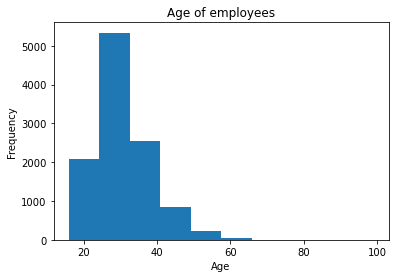

In [56]:
# your code goes here
df['Age'].plot(kind='hist')
plt.title('Age of employees')
plt.ylabel('Frequency')
plt.xlabel('Age')
plt.show()

## Outliers


### Finding outliers


Find out if outliers exist in the column `ConvertedComp` using a box plot?


<function matplotlib.pyplot.show(close=None, block=None)>

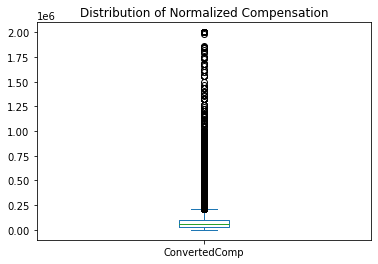

In [57]:
# your code goes here
df['ConvertedComp'].plot(kind='box')
plt.title('Distribution of Normalized Compensation')
plt.show

Find out the Inter Quartile Range for the column `ConvertedComp`.


In [58]:
# your code goes here
df['ConvertedComp'].dropna(inplace=True)
first_Quartile,third_Quartile=df['ConvertedComp'].quantile(.25),df['ConvertedComp'].quantile(.75)

IQR=third_Quartile - first_Quartile
print('Inter Quartile Range is {}'.format(IQR))

Inter Quartile Range is 73132.0


Find out the upper and lower bounds.


In [59]:
# your code goes here
upperQ=df['ConvertedComp'].quantile(0.75)
print('Third Quartile is {}'.format(upperQ)) 
lowerQ=df['ConvertedComp'].quantile(0.25)
print('First Quartile is {}'.format(lowerQ)) 

Third Quartile is 100000.0
First Quartile is 26868.0


In [60]:
df[(df['ConvertedComp'] < lowerQ) | (df['ConvertedComp'] > upperQ)].ConvertedComp.count()

5202

Identify how many outliers are there in the `ConvertedComp` column.


In [73]:
# your code goes here
df[(df['ConvertedComp'] < lowerQ) | (df['ConvertedComp'] > upperQ)].ConvertedComp.count()

5202

Create a new dataframe by removing the outliers from the `ConvertedComp` column.


In [88]:
# your code goes here
#upper_bound=third_Quartile+(1.5*IQR)
#lower_bound=first_Quartile+(1.5*IQR)
#df['ConvertedComp']=df['ConvertedComp'].clip(upperQ,lowerQ)

def Remove_Outlier_Indices(df):
    Q1 = df['ConvertedComp'].quantile(0.25)
    Q3 = df['ConvertedComp'].quantile(0.75)
    IQR = Q3 - Q1
    trueList = ~((df['ConvertedComp'] < (Q1 - 1.5 * IQR)) |(df['ConvertedComp'] > (Q3 + 1.5 * IQR)))
    return trueList


In [86]:
df['ConvertedComp'].median()

57745.0

<function matplotlib.pyplot.show(close=None, block=None)>

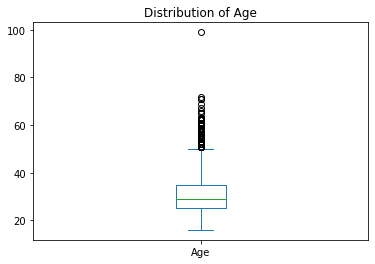

In [38]:
df['Age'].plot(kind='box')
plt.title('Distribution of Age')
plt.show

## Correlation


### Finding correlation


Find the correlation between `Age` and all other numerical columns.


Text(0.5, 1.0, 'Correlation of Age and CodeRevHrs')

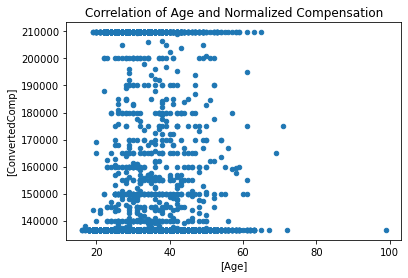

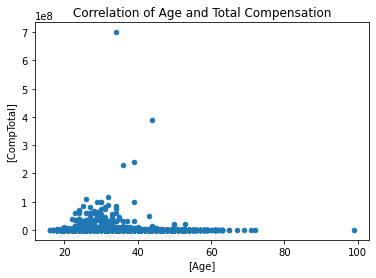

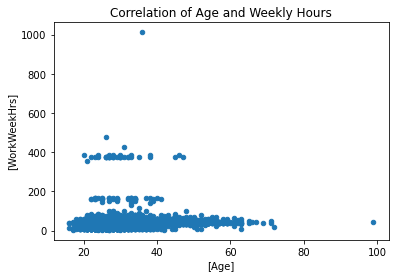

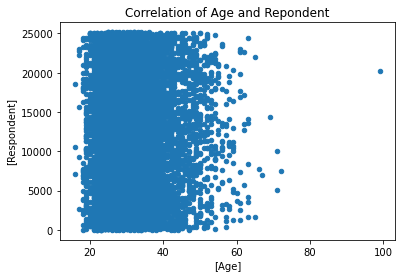

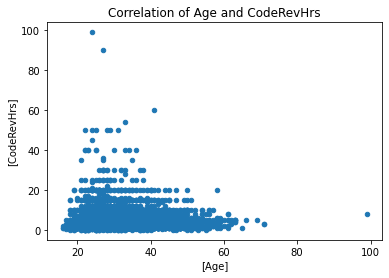

In [116]:
# your code goes here
#df.select_dtypes(include=np.number).columns.tolist()
#data=df[['Respondent','CompTotal','ConvertedComp','WorkWeekHrs', 'CodeRevHrs']]
df.plot(kind='scatter', x=['Age'], y=['ConvertedComp'],)
plt.title('Correlation of Age and Normalized Compensation')

df.plot(kind='scatter', x=['Age'], y=['CompTotal'],)
plt.title('Correlation of Age and Total Compensation')
df.plot(kind='scatter', x=['Age'], y=['WorkWeekHrs'],)
plt.title('Correlation of Age and Weekly Hours')
df.plot(kind='scatter', x=['Age'], y=['Respondent'],)
plt.title('Correlation of Age and Repondent')
df.plot(kind='scatter', x=['Age'], y=['CodeRevHrs'],)
plt.title('Correlation of Age and CodeRevHrs')

In [83]:
print(df['Age'].corr(df['CodeRevHrs']))

-0.02046911197002998


In [78]:
print(df['Age'].corr(df['CompTotal']))

0.006969933096795738


In [80]:
print(df['Age'].corr(df['WorkWeekHrs']))

0.036517649093192925


In [81]:
print(df['Age'].corr(df['Respondent']))

0.004041030828773916


In [82]:
print(df['Age'].corr(df['ConvertedComp']))

0.10538616072629126


## Authors


Ramesh Sannareddy


### Other Contributors


Rav Ahuja


## Change Log


| Date (YYYY-MM-DD) | Version | Changed By        | Change Description                 |
| ----------------- | ------- | ----------------- | ---------------------------------- |
| 2020-10-17        | 0.1     | Ramesh Sannareddy | Created initial version of the lab |


Copyright © 2020 IBM Corporation. This notebook and its source code are released under the terms of the [MIT License](https://cognitiveclass.ai/mit-license?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDA0321ENSkillsNetwork21426264-2022-01-01&cm_mmc=Email_Newsletter-\_-Developer_Ed%2BTech-\_-WW_WW-\_-SkillsNetwork-Courses-IBM-DA0321EN-SkillsNetwork-21426264&cm_mmca1=000026UJ&cm_mmca2=10006555&cm_mmca3=M12345678&cvosrc=email.Newsletter.M12345678&cvo_campaign=000026UJ).
